In [15]:
####################################
# SETUP Libraries and Import Dataset
####################################
# Standard modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scikit Learn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Visualizations
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Files
data = "../model/final.csv"

# load dataframe
df = pd.read_csv(filepath_or_buffer=data, sep=",", encoding="utf-8", header=0)
df = df.drop(columns=["Wind"])
pd.set_option('display.max_columns', None)
df.head(3)


,datetime,pm25,type,sensor,station_id,x,y,Population,Dist-MRoads,Dist-Setl,Dist-Coast,Dist-Forest,Slope,Elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,date,datehour,DATE,Temperature,Dew,Sky,Visibility,ATM,Wind-Dir,Wind-Rate
0,2019-07-21 17:00:00 UTC,19.42,PurpleAir,B,14th & S ST NW B (undefined) (38.913805 -77.0...,38.913805,-77.032750,54.049690,0.072,-1.541,2.792,1.596,1,29,6,-0.965926,-0.258819,-0.329408,-0.944188,2019-07-21,2019-07-21-17,2019-07-21T17:52:00,36.75,22.25,22000,16093,1011.75,300,5.7
1,2019-07-21 17:00:00 UTC,19.43,PurpleAir,A,14th & S ST NW (outside) (38.913805 -77.03275...,38.913805,-77.032750,54.049690,0.072,-1.541,2.792,1.596,1,29,6,-0.965926,-0.258819,-0.329408,-0.944188,2019-07-21,2019-07-21-17,2019-07-21T17:52:00,36.75,22.25,22000,16093,1011.75,300,5.7
2,2019-07-21 17:00:00 UTC,5.55,PurpleAir,A,arlington (outside) (38.900099 -77.081078) Pri...,38.900099,-77.081078,12.529437,0.171,-0.093,1.028,0.000,3,47,6,-0.965926,-0.258819,-0.329408,-0.944188,2019-07-21,2019-07-21-17,2019-07-21T17:52:00,36.75,22.25,22000,16093,1011.75,300,5.7


In [16]:
####################################
# Linear Regression, Lasso, Ridge, and ElasticNet
####################################
# set samples matrix [n_samples, n_features] (X) and target (y)
features = ['Population','sin_day','cos_day','Temperature','Dew','Sky','Visibility','ATM','Wind-Dir','Wind-Rate']
target   = ['pm25']

# fit data to model
X = df[features]
print(X.shape)
y = df[target]
print(y.shape)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(97862, 10)
(97862, 1)
(78289, 10)
(19573, 10)
(78289, 1)
(19573, 1)


Coefficients: [[ 4.99070877e-03  3.42004633e-01 -3.74329224e-01  1.07899013e-02
   9.08555597e-02  3.21382627e-06 -6.43883354e-06  6.62846767e-05
   8.20796802e-04 -6.15385978e-03]]

Intercept: [9.36965984]

R2 Score: 0.04178798386682736


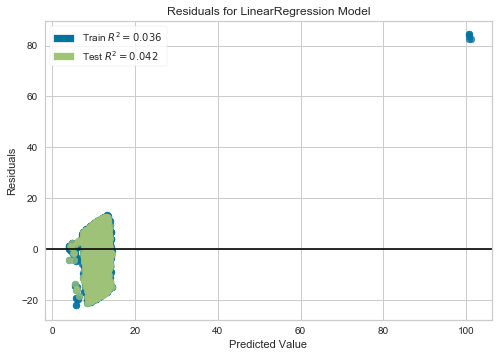

In [17]:
####################################
# Linear Regression
####################################
# instantiate the model
lr = LinearRegression()
visualizer = ResidualsPlot(model=lr, hist=False)

# fit data to model
visualizer.fit(X_train, y_train)

print(f'Coefficients: {lr.coef_}\n')
print(f'Intercept: {lr.intercept_}\n')

# predict
#pred = lr.predict(X_test)
#count = len(pred)

#print(f'Prediction #: {count}')
#print(pred[0:5])

# score model
visualizer.score(X_test, y_test)
print(f'R2 Score: {lr.score(X_test, y_test)}')

visualizer.show()

Coefficients: [ 5.06916707e-03  0.00000000e+00 -0.00000000e+00 -6.19137910e-04
  9.51750222e-02  3.18928777e-06 -6.61934005e-06  6.26248094e-05
  9.13504679e-04 -6.33324420e-03] 

Intercept: [9.51867658] 



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

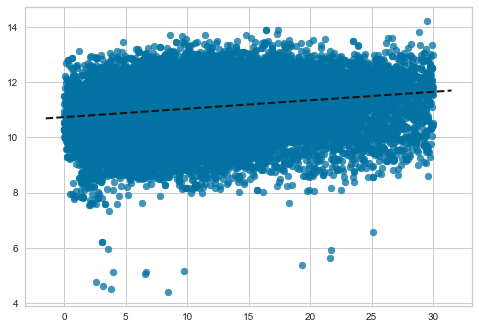

In [18]:
####################################
# Lasso Regression
####################################

# instantiate the model
lasso = Lasso(alpha=0.2)
visualizer = PredictionError(model=lasso)

# fit data to model
#lasso.fit(X_train, y_train)
visualizer.fit(X_train, y_train)

print(f'Coefficients: {lasso.coef_} \n')
print(f'Intercept: {lasso.intercept_} \n')

# predict
#pred = lr.predict(X_test)
#count = len(pred)

#print(f'Prediction #: {count}')
#print(pred[0:5])

# score model
visualizer.score(X_test, y_test)
print(f'R2 Score: {lasso.score(X_test, y_test)}')

#visualizer.show()

Coefficients: [[ 4.99070986e-03  3.42002562e-01 -3.74327145e-01  1.07897969e-02
   9.08556087e-02  3.21382585e-06 -6.43883419e-06  6.62846384e-05
   8.20797352e-04 -6.15386213e-03]] 

Intercept: [9.36966117] 

R2 Score: 0.041787995022803615


YellowbrickValueError: y must be a (1,) dimensional array not (19573, 1)

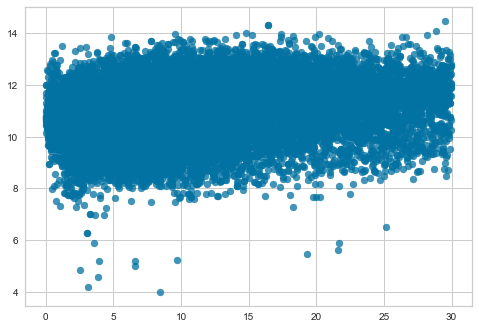

In [22]:
####################################
# Ridge Regression
####################################

# instantiate the model
ridge = Ridge(alpha=0.2)
visualizer = PredictionError(model=ridge)

# fit data to model
#lasso.fit(X_train, y_train)
visualizer.fit(X_train, y_train)

print(f'Coefficients: {ridge.coef_} \n')
print(f'Intercept: {ridge.intercept_} \n')

# predict
#pred = lr.predict(X_test)
#count = len(pred)

#print(f'Prediction #: {count}')
#print(pred[0:5])

# score model
print(f'R2 Score: {ridge.score(X_test, y_test)}')
visualizer.score(X_test, y_test)

#visualizer.show()